In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from IPython.display import display
from PIL import Image

def display_image(image):
    pil_image = Image.fromarray(image)
    display(pil_image)

image1 = cv2.imread("/content/drive/MyDrive/CV_lab2/1.jpg")
image2 = cv2.imread("/content/drive/MyDrive/CV_lab2/2.jpg")


In [ ]:
#Вибрати з інтернету набори зображень з різною контрастністю і різним флуктуаціями
#освітленості. Для кожного зображення побудувати варіант спотвореного (видозміненого
#зображення). Для кожної отриманої пари побудувати дескриптор і проаналізувати
#можливість суміщення цих зображень із визначенням параметрів геометричних перетворень
#(кут повороту, зміщень в напрямку х і напрямку y).

In [3]:
def hamming_distance(x, y):
    assert len(x) == len(y)
    return sum([(a != b) for a, b in zip(x, y)]) # counting the number of positions at which the corresponding elements in x and y are different


In [72]:
def get_keypoints_and_descriptors(img):
    # Create a FAST keypoint detector object
    fast = cv2.FastFeatureDetector_create()
    fast.setThreshold(25) # default is 10. Less Threshold, more keypoints we get
    # Detect keypoints using FAST
    keypoints = fast.detect(img, None)

    # Create a descriptor extractor object
    #sift = cv2.xfeatures2d.SIFT_create() -- work worse
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    # BRIEF descriptors are binary strings generated from simple intensity comparisons within a local image region, making them memory efficient and fast to match.

    # Compute descriptors using BRIEF
    keypoints, descriptors = brief.compute(img, keypoints)

    return keypoints, descriptors

In [73]:
fast = cv2.FastFeatureDetector_create()
default_threshold = fast.getThreshold()
print("Default threshold:", default_threshold)


Default threshold: 10


In [74]:
def own_comparer(img1, img2):
    kp1, des1 = get_keypoints_and_descriptors(img1)
    kp2, des2 = get_keypoints_and_descriptors(img2)

    matches = []
    for i, d1 in enumerate(des1):
        for j, d2 in enumerate(des2):
            matches.append(cv2.DMatch(_distance=float(hamming_distance(d1, d2)), _imgIdx=0, _queryIdx=i, _trainIdx=j))

    matches = sorted(matches, key=lambda x: x.distance) # The best matches will have smaller distances.

    result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)

    display_image(result)

In [75]:
def lib_comparer(img1, img2):
    kp1, des1 = get_keypoints_and_descriptors(img1)
    kp2, des2 = get_keypoints_and_descriptors(img2)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    matches = sorted(matches, key=lambda x: x.distance)

    result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=2)

    display_image(result)

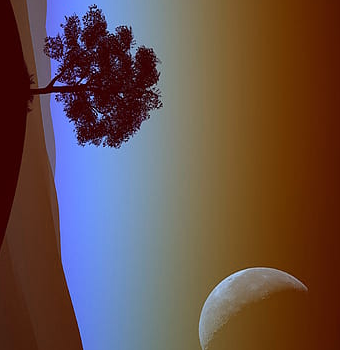

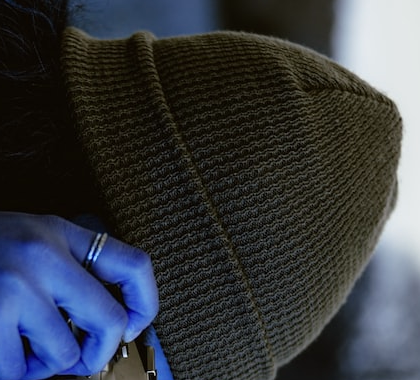

In [76]:
small_image1 = image1[10:350, 300:650]
small_image2 = image2[30:450, 120:500]

rotated_small_image1 = cv2.rotate(small_image1, cv2.ROTATE_90_CLOCKWISE)
rotated_small_image2 = cv2.rotate(small_image2, cv2.ROTATE_90_CLOCKWISE)

display_image(rotated_small_image1)
display_image(rotated_small_image2)


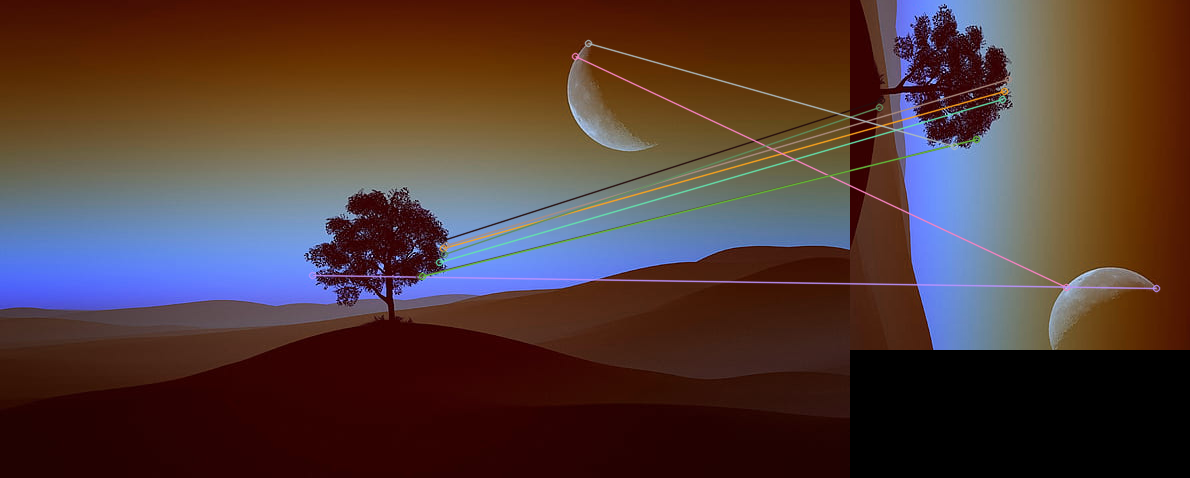

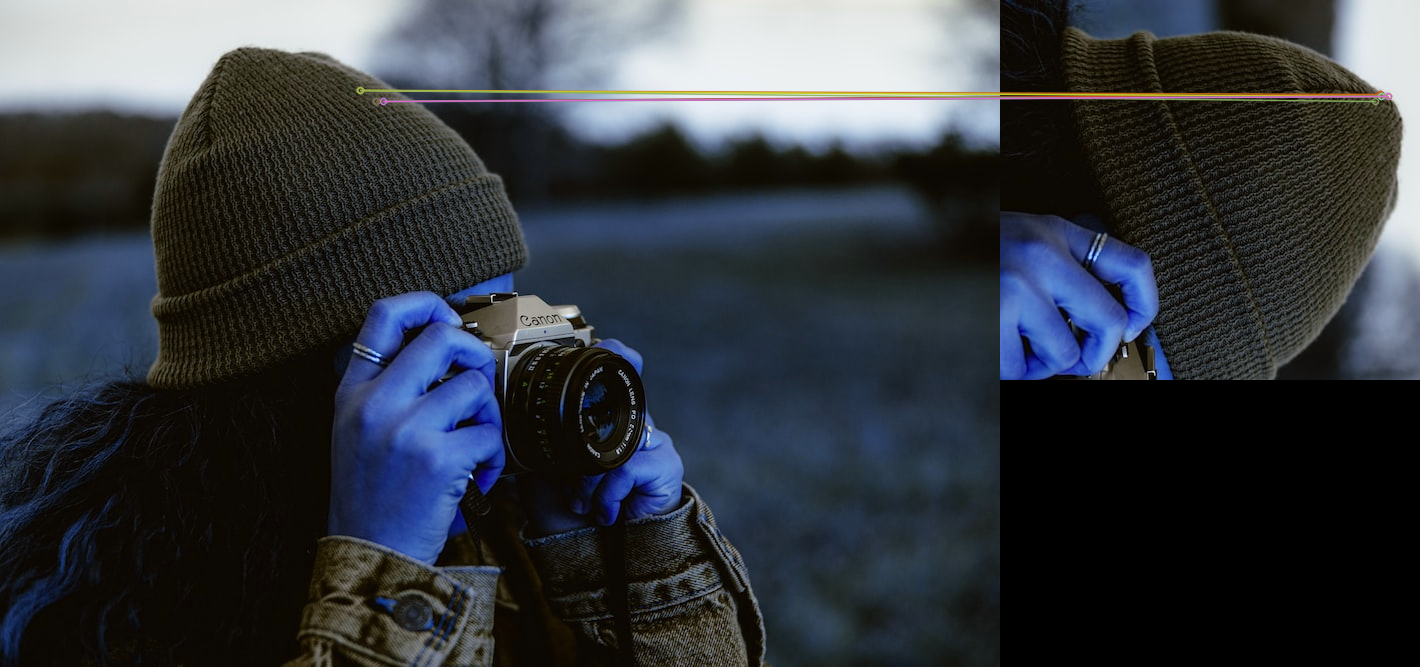

In [77]:
own_comparer(image1, rotated_small_image1)
own_comparer(image2, rotated_small_image2)

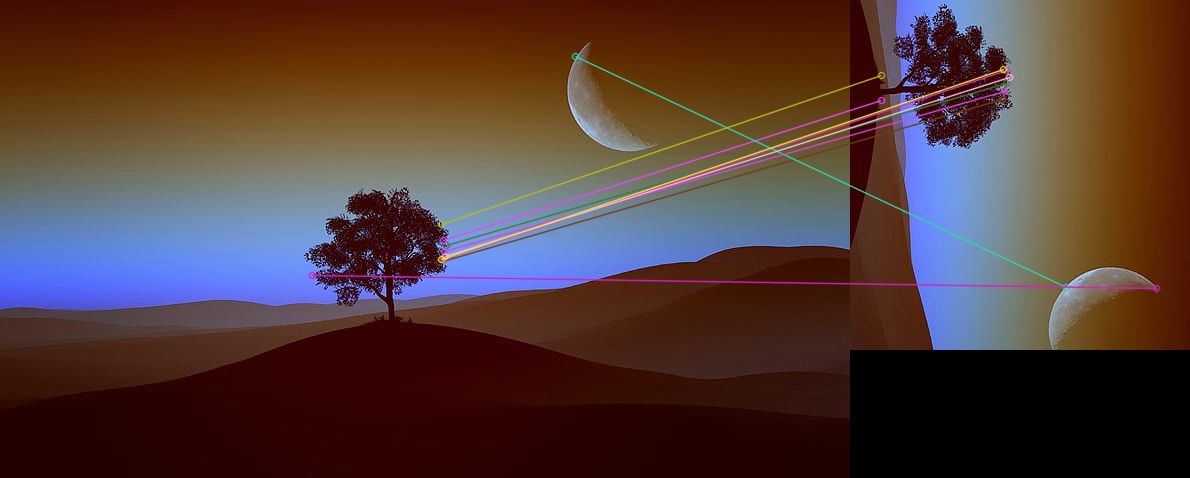

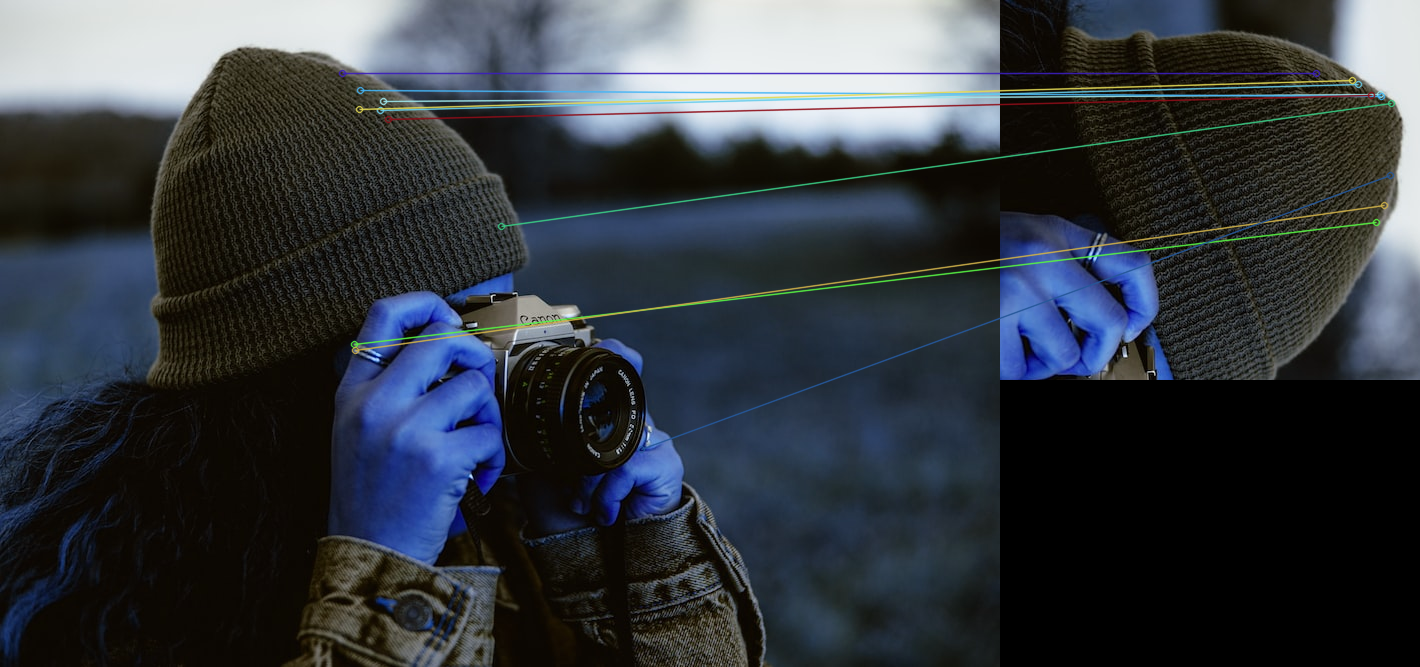

In [78]:
lib_comparer(image1, rotated_small_image1)
lib_comparer(image2, rotated_small_image2)

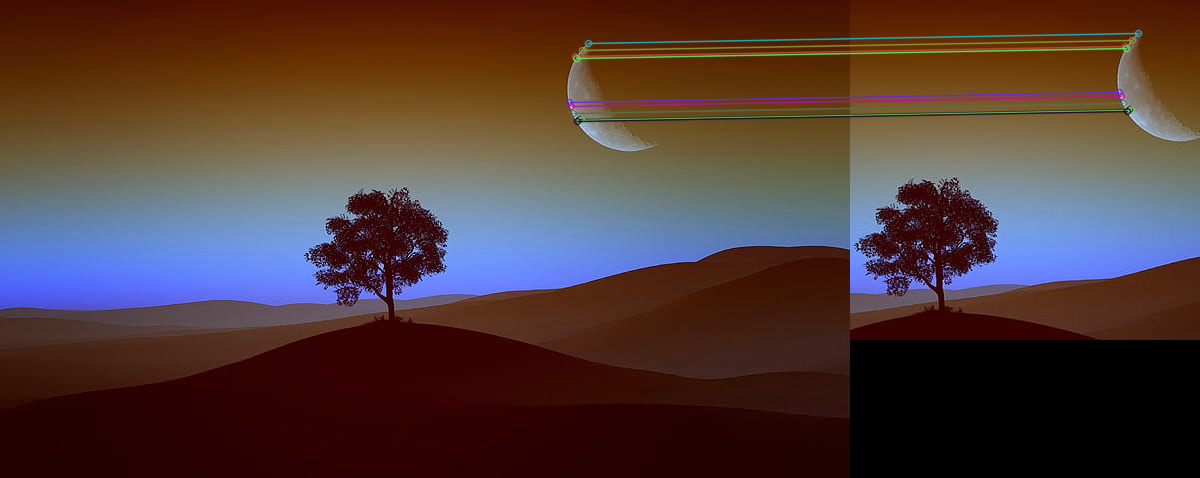

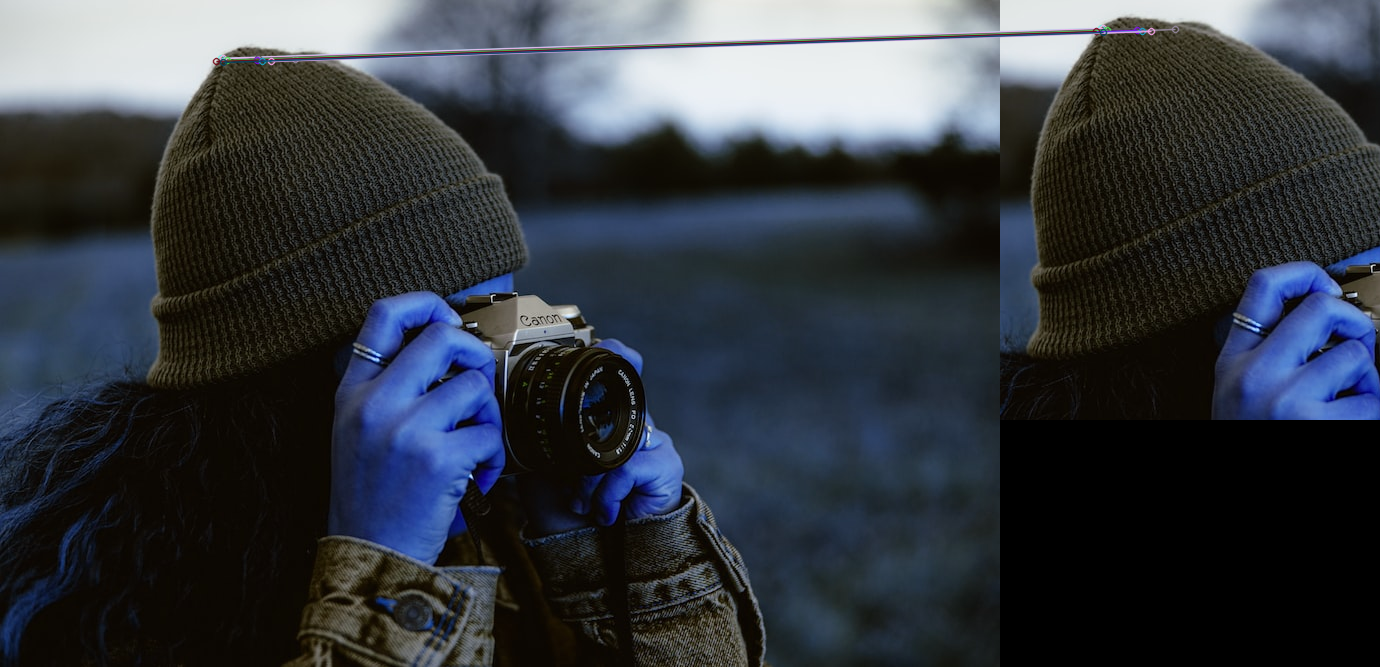

In [79]:
own_comparer(image1, small_image1)
own_comparer(image2, small_image2)

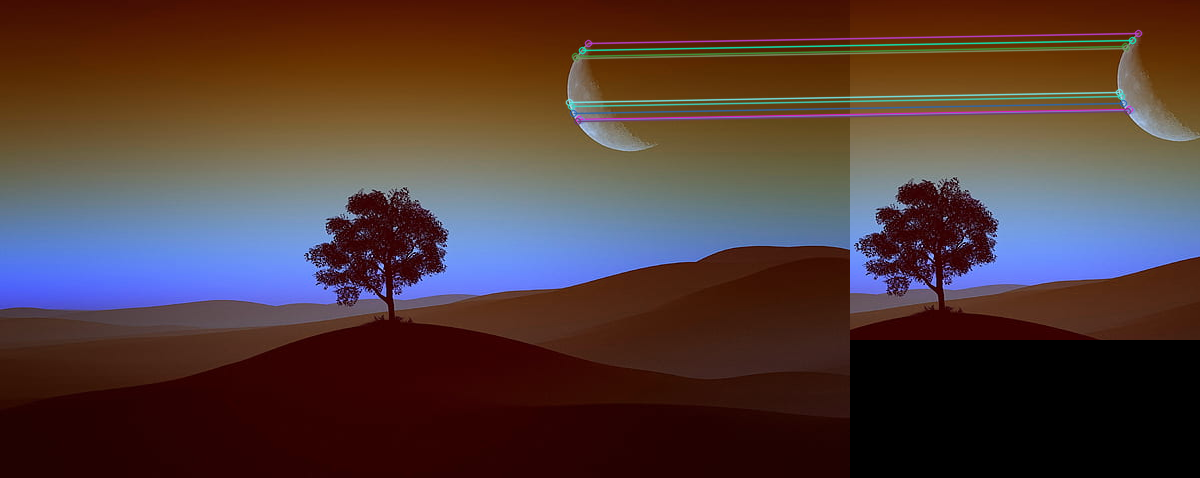

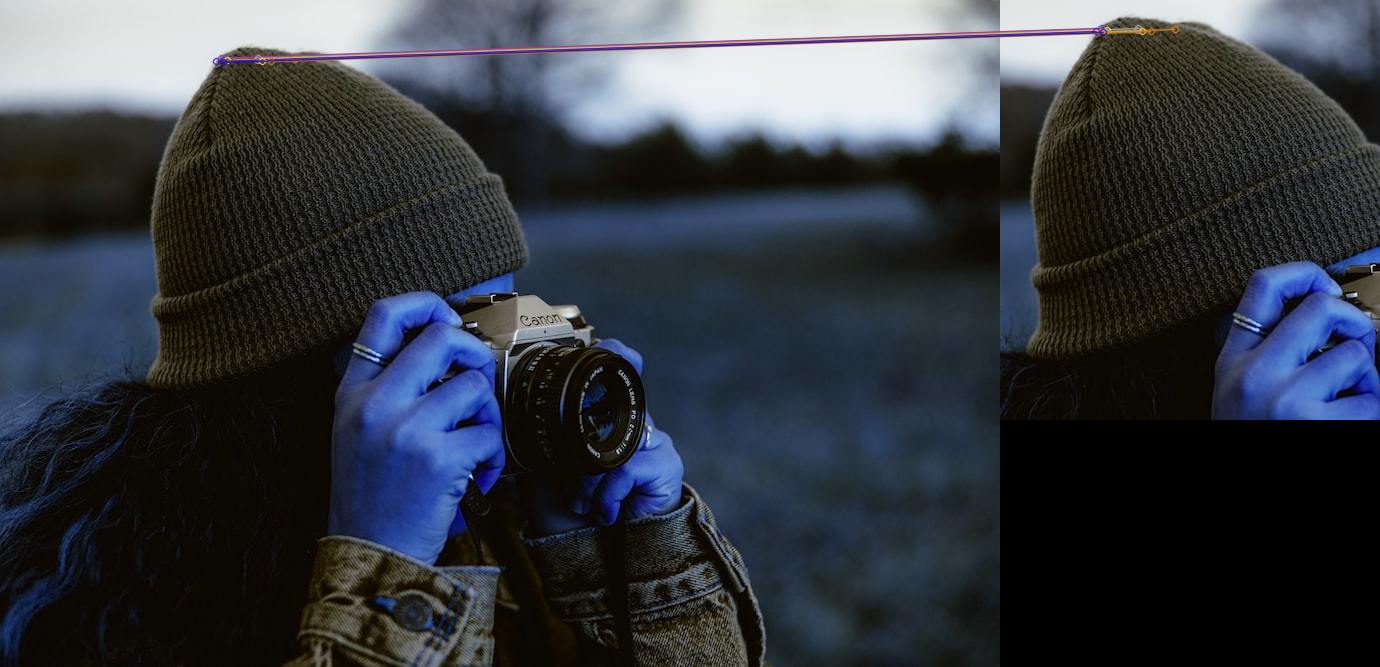

In [80]:
lib_comparer(image1, small_image1)
lib_comparer(image2, small_image2)
